# Guided Project: Predicting Employee Productivity Using Tree Models

## Table of Contents 
1. [Introduction](#introduction)
2. [Dataset Exploration](#data-explore)
3. [Dataset Cleaning (I)](#data-cleaning1)
4. [Dataset Cleaning (II)](#data-cleaning2)
5. [Feature Selection](#feat-select)
6. [Building the Decision Tree](#build-tree)
7. [Using Random Forest](#forest)
8. [Final Conclusions](#final)

## Introduction <a name="introduction"></a>

![garment_factory_medium.jpg](img/predictemplprod/garment_factory_medium.jpg)

Image source: [Designed by Freepik](http://www.freepik.com/)

This is a project I completed based on a guide called "Predicting Employee Productivity Using Tree Models" on the Dataquest learning platform. It uses the concept of  classification based on using tree models, for example Random Forests.

In this project I have learned new skills related to Machine Learning in Python. 

The implementation is written in Python and is shown in Jupyter Notebooks.c

### Goal of this project
The dataset is *Productivity Prediction of Garment Employees*, of which the source is the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees)

Below is a description of the data, according to the source:

> The garment industry is one of the key examples of the industrial globalization of the modern era.
>
> It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production 
> and delivery performance of the employees in the garment manufacturing companies.
>
> So, it is highly desirable among the decision-makers in the garments industry to track, analyze, and predict the productivity performance of the working teams in their
> factories.
>

## Dataset Exploration <a name="data-explore"></a>

This dataset was mined by a group of researchers. For more details see the introductory paper here: [Mining the productivity data of the garment industry](https://dl.acm.org/doi/abs/10.1504/ijbidm.2021.118183)

#### Data dictionary
We are tasked with using the dataset to track, analyze, and predict the productivity performance of the working teams in their factories.

Here is the documentation of the dataset:

* `date`: date in MM-DD-YYYY
* `quarter`: a portion of the month — month was divided into four quarters
* `department`: associated department with the instance
* `day`: day of the week
* `team`: associated team number with the instance
* `targeted_productivity`: targeted productivity set by the authority for each team for each day
* `smv`: standard minute value — the allocated time for a task
* `wip`: work in progress — includes the number of unfinished items for products
* `over_time`: represents the amount of overtime by each team in minutes
* `incentive`: represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action
* `idle_time`: the duration of time when the production was interrupted due to several reasons
* `idle_men`: the number of workers who were idle due to production interruption
* `no_of_style_change`: number of changes in the style of a particular product
* `no_of_workers`: number of workers on each team
* `actual_productivity`: the actual % of productivity that was delivered by the workers — it ranges from 0 to 1.


### Import the dependencies
First we need to import the libraries we think will at minimum be required for this project: pandas, numpy and matplotlib.pyplot.


In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load and explore the data
The garments worker productivity observations are stored in 1 file.
1. garments_worker_productivity.csv

In [206]:
# load files into dataframes
empl_df = pd.read_csv("data/predictemplprod/garments_worker_productivity.csv")

For a preview of the loaded data, display the first five rows of the dataset.

In [207]:
# explore the employee productivity data
empl_df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


For an idea of the size of the dataset, show the number of features and observations.

In [208]:
print(f"Number of features: {empl_df.shape[1]}")
print(f"Number of observations: {empl_df.shape[0]}")

Number of features: 15
Number of observations: 1197


Let's start exploring the columns in more details.

In [209]:
empl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

Observations:
* it appears that the only column with empty values is `wip`.
* the data types are a combination of integers, floating points and strings

Let's quickly look at how many empty values are in `wip`:

In [210]:
empl_df['wip'].isna().value_counts(normalize=True)

wip
False    0.577277
True     0.422723
Name: proportion, dtype: float64

42% of the rows contain an empty value for `wip`. That's a substantial amount of empty values, however, is it relevant? Or does it mean that this employee has no work in progress (unfinished items) at the end of each day, which is actually a positive? 

For now we assume the latter, and we'll need to convert these empty values to 0 later.

#### Distribution of the data
Next we look at the distribution of the data for each column. A histogram is a good visual for this. 

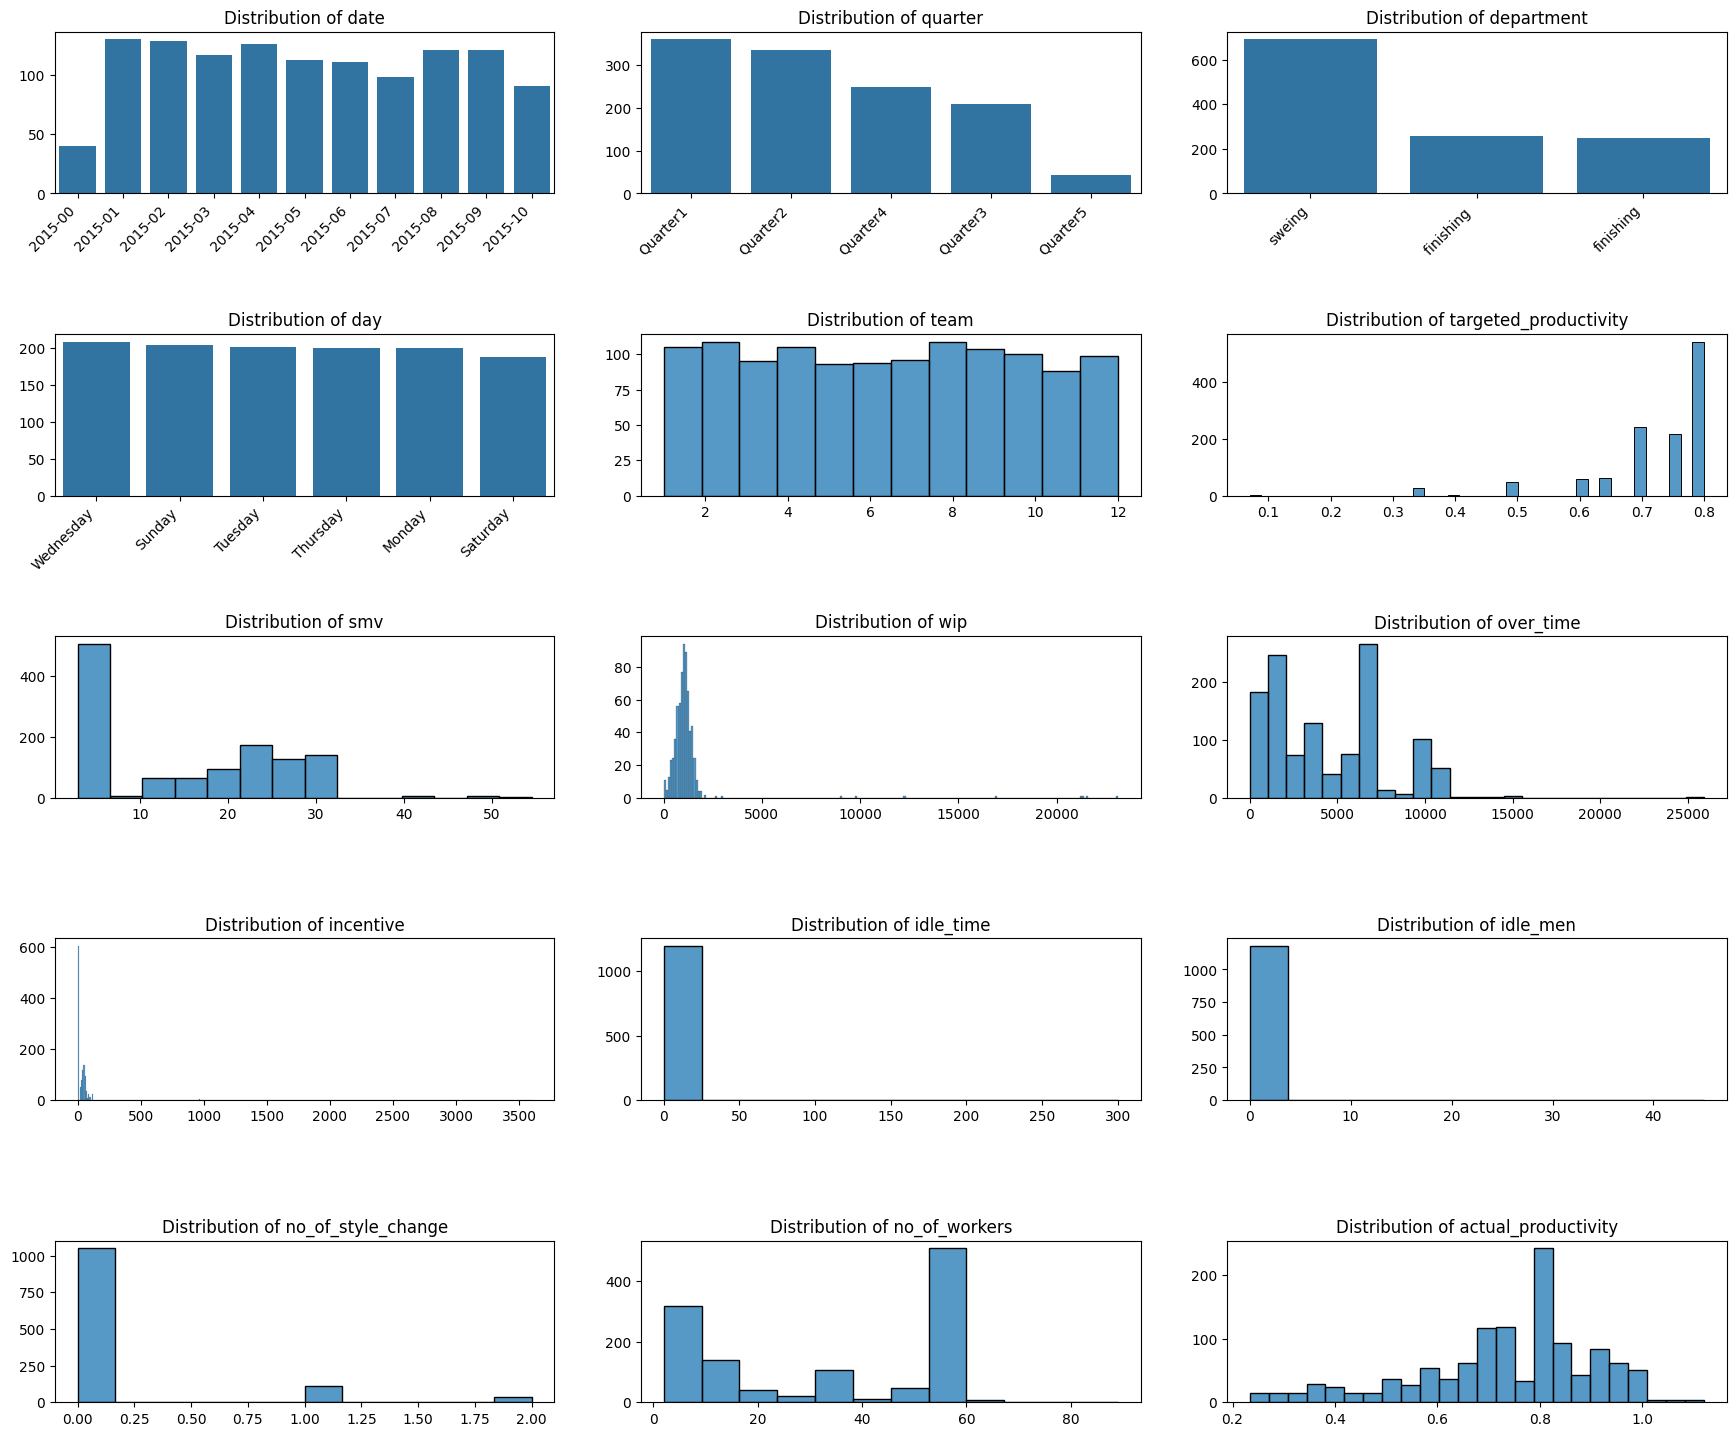

In [211]:
# create a copy for the visualization
empl_viz_df = empl_df.copy()

# convert the 'date' column to datetime format
empl_viz_df['date'] = pd.to_datetime(empl_viz_df['date'])

# set up the plotting area: adjust the figure size accordingly
num_plots = empl_viz_df.shape[1] - 1  # exclude the 'week_year' column
nrows = 5
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 15))

# flatten the axes array for easier iteration
axes = axes.flatten()

# track the current plot index
plot_index = 0

# iterate over each column except 'week_year' to plot
for col in empl_viz_df.columns:
    if col == 'week_year':
        continue  # skip plotting for 'week_year'
    
    ax = axes[plot_index]
    # check the data type of the column
    if col == 'date':
        # special case for the 'date' column: group by week-year and plot
        date_counts = empl_viz_df['date'].dt.strftime('%Y-%U').value_counts().sort_index()
        sns.barplot(x=date_counts.index, y=date_counts.values, ax=ax)
        ax.set_xticks(np.arange(len(date_counts)))
        ax.set_xticklabels(date_counts.index, rotation=45, ha="right")
    elif np.issubdtype(empl_viz_df[col].dtype, np.number):
        # numeric column: plot a histogram
        sns.histplot(empl_viz_df[col], kde=False, ax=ax)
    else:
        # categorical column: plot a bar chart
        sns.countplot(x=empl_viz_df[col], order=empl_viz_df[col].value_counts().index, ax=ax)
        ax.set_xticks(np.arange(len(empl_viz_df[col].value_counts())))
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

    # increment the plot index
    plot_index += 1

# hide any unused subplots
for j in range(plot_index, len(axes)):
    fig.delaxes(axes[j])

# adjust layout to prevent overlap
plt.tight_layout(pad=3.0)
plt.show()

**Observations**

- `date`: as there are 59 distinct values, we grouped by "year-week". It looks like a pretty normal distribution over a time period of 10 weeks.
- `quarter`: quarters 1 and 2 seemed most productive. Also, this column is a data issue it seems: "Quarter5" does not make sense.
- `department`: Although it appears there are 3 unique values, a blank trailing space appears for some rows of "finishing". Also, there is a typo: "sweing" should be "sewing".
- `day`: a normal distribution over 6 days of the week. Friday appears to be missing, maybe a day off for all workers?
- `team`: a normal distribution.
- `targeted_productivity`: most values occur between 0.7 and 0.8 (70-80%). 
- `smv`: a large number of tasks (>400) appear to be very simple with low time consumption of under 10 minutes. A smaller amount of tasks vary between 10 and 30 minutes, with very few taking longer than 30 minutes.
- `wip`: remember, here we are dealing with many empty values, but we assume they mean "no work in progress at the end of the day". 
- `over_time`: a bimodal distribution, with two peaks, indicating two distinct groups of data in the 0-2000 and the 7000-8000 buckets.
- `incentive`: right-skewed, a lot of zero values, with most non-zero values that are in the low hundreds. However, judging by the range of data range it  appears there are a few outliers, with the max. value being ca. 3600
- `idle_time`: right-skewed, a lot of zero values, with most non-zero values that are in the low hundreds. However, judging by the range of data range it  appears there are a few outliers, with the max. value being ca. 300
- `idle_men`: similiar to the previous column `idle_time`, which makes sense, as an interruption in the production affects the number of employees who will be idle as a result. Instead this column represents a count of employees. 
- `no_of_style_change`: mostly zero, but a small number of rows with 1-2 changes
- `no_of_workers`: a bimodal distribution, with two peaks, indicating two distinct groups of data in the ca. 0-10 and the ca. 50-60 buckets.
- `actual_productivity`: this is the target column. The distribution is left skewed, with a peak at ca. 0.8.

Next, let's already compare relevant columns with each other (i.e., targeted_productivity vs. actual_productivity). A double histogram is a good visualsation for this purpose.

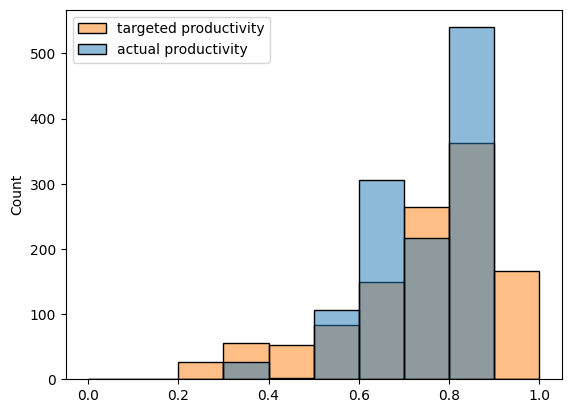

In [212]:
bins = np.arange(0, 1.1, 0.1)
sns.histplot(data={
    'targeted_productivity': empl_df['targeted_productivity'], 
    'actual_productivity': empl_df['actual_productivity']
}, bins=bins, alpha=0.5, multiple="layer")
plt.legend(['targeted productivity', 'actual productivity'])

Interesting. This chart be summarised as follows:
- actual productivity doesn't meet targeted productivity when its below 50%
- from 50%-90%, target productivity is almost always reached
- target productivity of above 90% was never actually met.
- one can generally say, that for low targets, the employees "underproduce", and vice versa, they "overproduce".

## Dataset Cleaning (I) <a name="data-cleaning1"></a>

### Clean data

In the previous section, we have already noticed some columns where the data needs to be cleaned. Let's do this step by step.

In [213]:
empl_clean_df = empl_df.copy()

`quarter`

This could be a column to keep, as we saw there was quite some variation. So let's clean it.

In [214]:
empl_clean_df['quarter'].value_counts(normalize=True)

quarter
Quarter1    0.300752
Quarter2    0.279866
Quarter4    0.207185
Quarter3    0.175439
Quarter5    0.036759
Name: proportion, dtype: float64

"Quarter5" is quite substantial, with 4%. Let's see whether this is an incorrect assigmnent based on the date. 

In [215]:
empl_clean_df[empl_clean_df['quarter'] == 'Quarter5'][['date']].value_counts()

date     
1/31/2015    24
1/29/2015    20
Name: count, dtype: int64

Probably a data issue with `quarter` that we can fix easily.

In [216]:
empl_clean_df.loc[empl_df['quarter'] == 'Quarter5', 'quarter'] = 'Quarter1'
empl_clean_df['quarter'].value_counts(normalize=True)

quarter
Quarter1    0.337510
Quarter2    0.279866
Quarter4    0.207185
Quarter3    0.175439
Name: proportion, dtype: float64

`department`

Another column we should consider keeping. We have to take care of the typo and the trailing space.

In [217]:
empl_clean_df['department'].value_counts(normalize=True)

department
sweing        0.577277
finishing     0.214703
finishing     0.208020
Name: proportion, dtype: float64

In [218]:
empl_clean_df.loc[empl_df['department'] == 'sweing', 'department'] = 'sewing'
empl_clean_df.loc[empl_df['department'] == 'finishing ', 'department'] = 'finishing'
empl_clean_df['department'].value_counts(normalize=True)

department
sewing       0.577277
finishing    0.422723
Name: proportion, dtype: float64

`wip`

This column could be important but contained many empty values. For the tree model its required that there are no empty values. 

In [219]:
empl_clean_df['wip'] = empl_clean_df['wip'].fillna(0.0)
empl_clean_df["wip"].isna().value_counts()

wip
False    1197
Name: count, dtype: int64

### Target column

Next, we create a target column from `targeted_productivity` and `actual_productivity`. We can take the difference between the former and the latter, and depending on the resulting number add a label (let's call it `target`) according to this logic:
- positive or 0: "reached or over"
- negative: "under"

In [220]:
empl_clean_df['productivity_target_met'] = (empl_clean_df['actual_productivity'] >= empl_clean_df['targeted_productivity']).astype(int)
empl_clean_df['productivity_target_met'].value_counts(normalize=True)

productivity_target_met
1    0.730994
0    0.269006
Name: proportion, dtype: float64

Since we used 2 columns to create a new one, we can drop the original 2 colums.

In [221]:
# drop the productivity colums and confirm
empl_clean_df = empl_clean_df.drop(columns=['actual_productivity', 'targeted_productivity'], axis=1)
empl_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     1197 non-null   object 
 1   quarter                  1197 non-null   object 
 2   department               1197 non-null   object 
 3   day                      1197 non-null   object 
 4   team                     1197 non-null   int64  
 5   smv                      1197 non-null   float64
 6   wip                      1197 non-null   float64
 7   over_time                1197 non-null   int64  
 8   incentive                1197 non-null   int64  
 9   idle_time                1197 non-null   float64
 10  idle_men                 1197 non-null   int64  
 11  no_of_style_change       1197 non-null   int64  
 12  no_of_workers            1197 non-null   float64
 13  productivity_target_met  1197 non-null   int64  
dtypes: float64(4), int64(6),

## Dataset Cleaning (II) <a name="data-cleaning2"></a>

We continue the data cleaning, but with a focus on the categorical columns. 

### Explore and convert categorical columns
From our visualisation of each column, we can easily identify the categorical columns. We should convert some of the categorical columns to numerical to use them in our model. 

In [222]:
# identify categorical columns
empl_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     1197 non-null   object 
 1   quarter                  1197 non-null   object 
 2   department               1197 non-null   object 
 3   day                      1197 non-null   object 
 4   team                     1197 non-null   int64  
 5   smv                      1197 non-null   float64
 6   wip                      1197 non-null   float64
 7   over_time                1197 non-null   int64  
 8   incentive                1197 non-null   int64  
 9   idle_time                1197 non-null   float64
 10  idle_men                 1197 non-null   int64  
 11  no_of_style_change       1197 non-null   int64  
 12  no_of_workers            1197 non-null   float64
 13  productivity_target_met  1197 non-null   int64  
dtypes: float64(4), int64(6),

From the above list, looking at the data type and the type of information in this column, we can list the categorical columns that we want to keep.

In [223]:
# list of categorical columns
categ_cols = ['quarter', 'department', 'day', 'team']


Notes: 
- we don't include `date` as it has 59 distinct values, which doesn't help us within the context of this exercise.
- `quarter` could be a nice way for the model to predict results in an aggregated fashion
- `day` might bring some insights about productivity on specific days of the week
- `department` and `team` could bring insights for resource management

We have the target column `productivity_target_met` introduced in the last step, which is already in the format we need (1 or 0)

Let's act on our notes. First we remove `date`.

In [224]:
# drop the date column and confirm
empl_clean_df = empl_clean_df.drop(columns='date', axis=1)
empl_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   quarter                  1197 non-null   object 
 1   department               1197 non-null   object 
 2   day                      1197 non-null   object 
 3   team                     1197 non-null   int64  
 4   smv                      1197 non-null   float64
 5   wip                      1197 non-null   float64
 6   over_time                1197 non-null   int64  
 7   incentive                1197 non-null   int64  
 8   idle_time                1197 non-null   float64
 9   idle_men                 1197 non-null   int64  
 10  no_of_style_change       1197 non-null   int64  
 11  no_of_workers            1197 non-null   float64
 12  productivity_target_met  1197 non-null   int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 121.7+ KB


Next we one-hot encode these columns using the `make_column_transformer` tool, and combining the resulting dataset with the rest of the columns. 

In [225]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

empl_col_trans = make_column_transformer(
        (OneHotEncoder(), categ_cols), 
        remainder = "passthrough", 
        verbose_feature_names_out = False)

onehot_df = empl_col_trans.fit_transform(empl_clean_df)

empl_encoded_df = pd.DataFrame(onehot_df, 
            columns = empl_col_trans.get_feature_names_out())

In [226]:
# preview the first 5 rows
empl_encoded_df.head()

,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,department_finishing,department_sewing,day_Monday,day_Saturday,day_Sunday,day_Thursday,...,team_12,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,productivity_target_met
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,26.16,1108.0,7080.0,98.0,0.0,0.0,0.0,59.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.94,0.0,960.0,0.0,0.0,0.0,0.0,8.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,11.41,968.0,3660.0,50.0,0.0,0.0,0.0,30.5,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,11.41,968.0,3660.0,50.0,0.0,0.0,0.0,30.5,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,25.90,1170.0,1920.0,50.0,0.0,0.0,0.0,56.0,1.0


To conclude our dataset cleaning, we ended up with 35 columns which we can now use for feature selection and then building the tree model. 

## Feature Selection <a name="feat-select"></a>

### Correlations
To help us with selecting the features we want to keep, a correlation heatmap is helpful.

#### Correlations with the target column

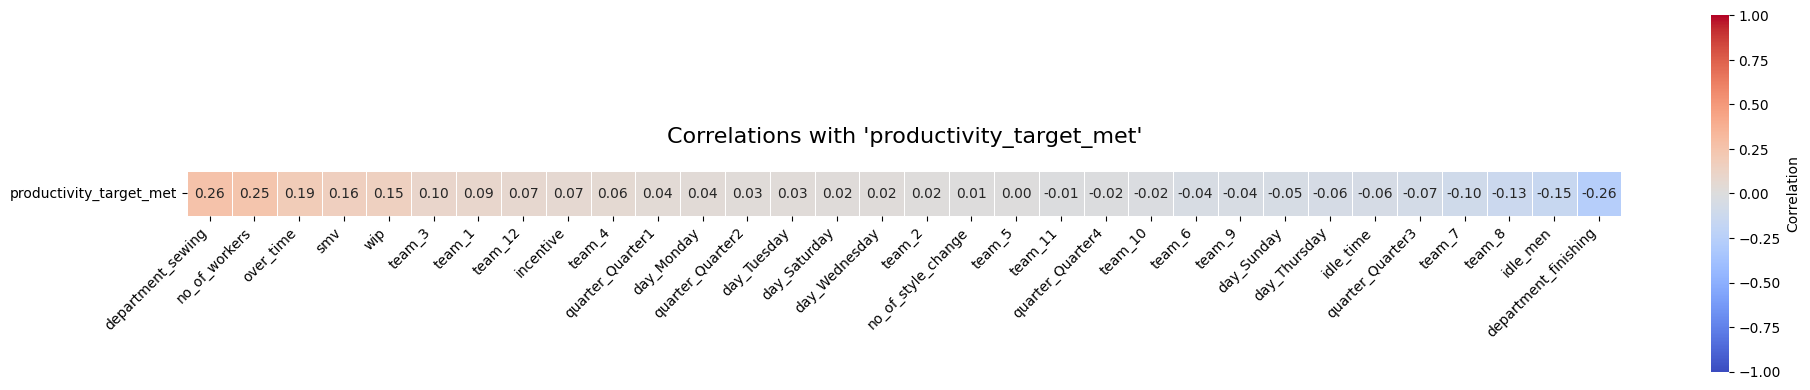

In [227]:
# calculate correlations
corr = empl_encoded_df.corr()

# only correlations with the target column
target_corr = corr['productivity_target_met'].sort_values(ascending=False)

# remove self-correlation of the target attribute
target_corr = target_corr.drop('productivity_target_met')

# create a DataFrame for the heatmap data
heatmap_data = pd.DataFrame(target_corr).transpose()

# define and draw the matplotlib figure
plt.figure(figsize=(20, 4))  # Adjust figure size for a single row
ax = sns.heatmap(heatmap_data, 
                 annot=True, 
                 fmt=".2f",
                 cmap='coolwarm',
                 vmin=-1, vmax=1, 
                 center=0, 
                 square=True,
                 linewidths=.5,
                cbar_kws={"label": 'Correlation'})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
ax.set_title("Correlations with 'productivity_target_met'", fontsize=16, pad=20)
ax.set_ylabel('')
plt.tight_layout()
plt.show()

#### Observations about correlations
There are not any strong correlations (let's say > 0.5) with the target column. Therefore we should probably settle with the columns which have medium-low (+/- 0.1 to 0.3) correlations:
- `department_sewing`
- `department_finishing`
- `no_of_workers`
- `over_time`
- `smv`
- `wip`
- `idle_men`

Note: the `team` attribute could be one additional to include (`team_8` has correlation -0.13) but we already have 7 attributes which we can use for our model.

In [228]:
empl_final_df = empl_encoded_df.copy()
empl_final_df = empl_final_df[['department_sewing', 'department_finishing','no_of_workers', 'over_time', 'smv', 'wip', 'idle_men', 'productivity_target_met']]


The feature selection is done - we have 7 features. We can move on to the next step.

## Building the Decision Tree <a name="build-tree"></a>

Next, we will create train and test data and build the decision tree classifier model.

In [229]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# grouping feature columns into X and target column into y
X = empl_final_df.drop(['productivity_target_met'], axis = 1)
y = empl_final_df['productivity_target_met']

# creating training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 18)

# instantiating classification tree
class_tree_entrop = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 18)

# fitting the model
class_tree_entrop.fit(X_train, y_train)

# predict on test set
y_pred_tree = class_tree_entrop.predict(X_test)

# get an accuracy score
print("Accuracy:", round(accuracy_score(y_test, y_pred_tree), 3))

Accuracy: 0.825


We got an accuracy score for our decision of 82% which is good.

## Visualizing and Evaluating the Decision Tree <a name="eval-tree"></a>

Let's visualize the model as a tree and do some evaluation.

In [230]:
# we do this to identify how our model labels cases and non-cases
class_tree_entrop.classes_,

(array([0., 1.]),)

Non-cases are 0, cases are 1, in that order.

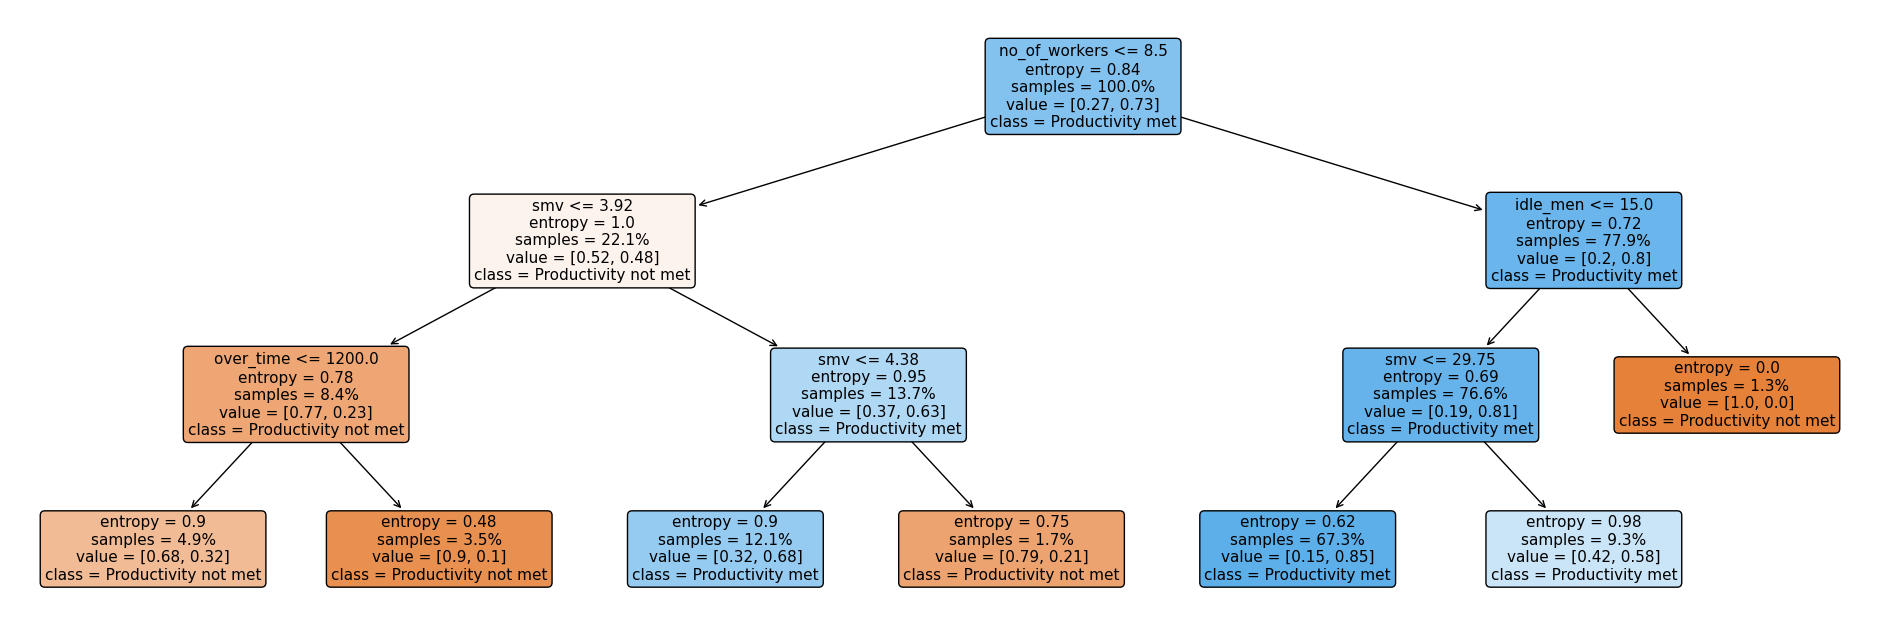

In [231]:
from sklearn.tree import plot_tree

plt.figure(figsize = [24.0, 8.0]) # Setting the size of displayed Tree

_ = plot_tree(class_tree_entrop, 
    feature_names = X.columns, 
    class_names = ['Productivity not met', 'Productivity met'],   # as the previous cell's labelling convention revealed to us
    filled = True,       
    proportion = True,
    precision = 2,
    rounded = True,
    fontsize = 11)

plt.show()

### Executive summary
We used **decision trees** to build the predictive model based on employee productivity data. They are supervised machine learning algorithms, meaning that there is data with target columns (labels) available for training the model. The ultimate goal of decision trees is to split our datasets into homogeneous groups of observations. 

With our emloyee productivity dataset, we reduced the number of columns (features) to what we consider having most impact on the productivity levels.

Above you see a visualisation of the decision tree based on our dataset, with observations that belong to the same target column class, being either *Productivity not met* in orange or *Productivity met* in blue. 

Decision trees work by recursively splitting our datasets based on binary conditions, called thresholds, for example "Number of workers <= 8.5", which is the first threshold at the top (root) node. The rest of the tree is traversed down by going either left (true) or right (false), to finally arrive at the target class in the terminal nodes (leaves).

For example, let's take an observation with no_of_workers = 10, idle_men = 0 and smv (standard minute value / allocated task time) = 20. 
1. Our root node evaluates no_of_workers = 10 <= 8.5 which is false, so we go right
2. The next node evaluates idle_men = 0 <= 15.0 which is true, so we go left
3. The next node evaluates smv = 20 <= 29.75 which is true, so we go left
4. We arrive at the leave node, which the target class is *Productivity met*

A possible conclusion is that by minimizing idle time we can reduce the number of workers required per shift and still meet the majority of targets set.

## Using Random Forest <a name="forest"></a>

By using an ensemble method like random forest we can try to improve the model's accuracy.

In [232]:
from sklearn.ensemble import RandomForestClassifier

# the dataset was already divided into training and test subsets on a previous screen

# instantiate with no hyperparameters, fit, and get an initial test prediction score
random_forest = RandomForestClassifier(random_state = 18)
random_forest.fit(X_train, y_train)
y_pred_forest = random_forest.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred_forest), 10))

Accuracy: 0.8138888889


An accuracy of 0.81 for the initial random forest without hyperparameters is good, but we expect it to outperform our decision tree which has an accuracy of 0.82. 

Let's perform a grid search on the random forest to find and apply the best parameters to an improved random forest.

In [233]:
from sklearn.model_selection import GridSearchCV

params = {
'max_depth': list(range(3, 8)), 
'n_estimators': [10, 50, 100]
}
rand_for_grid = RandomForestClassifier()
grid_search = GridSearchCV(rand_for_grid, param_grid = params, n_jobs=-1, scoring='accuracy')
grid_search.fit(X, y)

print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'max_depth': 5, 'n_estimators': 100}


In [234]:
# instantiate new, improved forest with hyperparameters, fit, and get an initial test prediction score
random_forest_improved = RandomForestClassifier(random_state = 18, max_depth = 4, n_estimators = 50, n_jobs = -1)
random_forest_improved.fit(X_train, y_train)
y_pred_forest_improved = random_forest_improved.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred_forest_improved), 10))

Accuracy: 0.8027777778


Even by adjusting some of the random forest model's hyperparameters, it was not possible to increase the accuracy. 

### Comparing the models

Comparing the evaluation of decision tree and the random forest using the accuracy score on predicting test data:

| Metric       | Decision Tree  | Random Forest |
|--------------|-------------|------------|
| Accuracy     | 82.5%       | 81.4%      |

The accuracy scores differ by 1%, so the decision tree seems robust enough. Also by comparing the two models, we can be assured that there is no overfitting happening with the decision tree. 

## Final Conclusions <a name="final"></a>

In summary, our decision tree model performed better than the random forest model.

What I learned in this project: 
- Understand the data you are given. You don't need to be a domain expert, but invest some time into reading the data dictionary and summarizing some concepts in your own words.
- Use visuals to understand the data distribution. You may be able to make early conclusions about what data to use in your model and where you need to invest most time in data preparation. 
- Take your time when cleaning the data, making sure that you preserve the important data point and not discard any important columns.
- When building decision trees, its a good check to compare your evaluation results with a random forest.